# Model fitting and understanding . 
* V2: The operation process is simplified. 

* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [3]:
library(rms)
#data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datssource_code_3.csv')# , stringsAsFactors=FALSE
data <- read.csv('J:/EECS6414/process/Pipeline/Data_cleaning/kernel_datassource_code_with_and_without_vote_0.csv')
#data <- data[, -c(90:104)]
col_name <- names(data)
env_vars <- col_name
vote_num <- data[c("km_votes")]
high_voted <- data[c("high_voted")]
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author", "id", "km_language", "km_tags", "cvp_import", "cvp_import_from", 
                "km_votes", "high_voted",  
                "km_forks", "km_comments", "km_views"
                 #"competition", "organization" # unnecessary variables. 
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
# for (env in env_vars){
#    print(paste(env, "+"))
# }
data <- data[env_vars]

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



In [7]:
env_vars

[1] "cvo_num_of_cell"               "cvo_num_of_output"            
 [3] "cvo_display_data"              "cvo_stream"                   
 [5] "cvo_execute_result"            "cvo_error"                    
 [7] "cvp_sloc"                      "cvp_comments"                 
 [9] "cvp_empty"                     "cvp_mccabe"                   
[11] "km_dataSources"                "km_versions"                  
[13] "km_competitions"               "km_competition_size_ttl"      
[15] "km_competition_size_avg"       "km_competition_size_max"      
[17] "km_competition_size_min"       "km_competition_discussion_ttl"
[19] "km_competition_discussion_avg" "km_competition_discussion_max"
[21] "km_competition_discussion_min" "km_competition_competitor_ttl"
[23] "km_competition_competitor_avg" "km_competition_competitor_max"
[25] "km_competition_competitor_min" "km_datasets"                  
[27] "km_dataset_size_ttl"           "km_dataset_size_avg"          
[29] "km_dataset_size_max"           "km_dataset_size_min"          
[31] "km_dataset_discussion_ttl"     "km_dataset_discussion_avg"    
[33] "km_dataset_discussion_max"     "km_dataset_discussion_min"    
[35] "km_dataset_kernel_ttl"         "km_dataset_kernel_avg"        
[37] "km_dataset_kernel_max"         "km_dataset_kernel_min"        
[39] "km_dataset_download_ttl"       "km_dataset_download_avg"      
[41] "km_dataset_download_max"       "km_dataset_download_min"      
[43] "km_dataset_view_ttl"           "km_dataset_view_avg"          
[45] "km_dataset_view_max"           "km_dataset_view_min"          
[47] "km_dataset_vote_ttl"           "km_dataset_vote_avg"          
[49] "km_dataset_vote_max"           "km_dataset_vote_min"          
[51] "km_dataset_version_ttl"        "km_dataset_version_avg"       
[53] "km_dataset_version_max"        "km_dataset_version_min"       
[55] "km_Hidden"                     "km_Notebook"                  
[57] "km_null"                       "km_Data"                      
[59] "km_Visualization"              "km_Other"                     
[61] "km_isNotebook"                 "km_num_of_tags"               
[63] "km_tags_te_sum"                "km_tags_te_avg"               
[65] "km_tags_te_max"                "km_tags_te_min"               
[67] "km_tags_te_median"             "cvp_num_of_ipt"               
[69] "cvp_ipt_te_sum"                "cvp_ipt_te_avg"               
[71] "cvp_ipt_te_max"                "cvp_ipt_te_min"               
[73] "cvp_ipt_te_median"             "cvp_num_of_iptfrm"            
[75] "cvp_iptfrm_te_sum"             "cvp_iptfrm_te_avg"            
[77] "cvp_iptfrm_te_max"             "cvp_iptfrm_te_min"            
[79] "cvp_iptfrm_te_median"

png 
  2

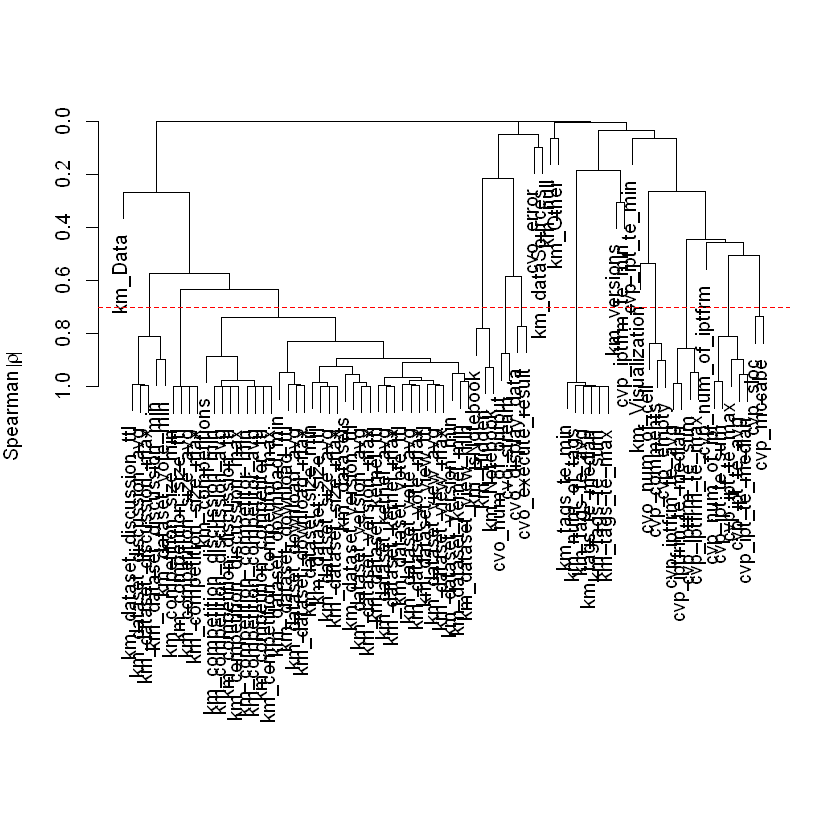

In [4]:
vcobj = varclus(~ ., 
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [1]:
env_vars <- c(
    "km_null",#
    "km_Other",# 
    "km_tags_te_avg", #
    "cvp_comments", #
    "cvp_iptfrm_te_avg",# 
    "cvp_ipt_te_avg", #
    "cvp_sloc",#
    "km_dataset_discussion_avg", #
    "km_competition_size_avg", #
    "km_dataset_vote_avg",#
    "km_isNotebook",#
    "cvo_num_of_output",# 
    "cvo_display_data", #
    "km_versions", #
    "cvp_iptfrm_te_min", #
    "km_Visualization", #
    "cvp_ipt_te_min", #
    "cvp_num_of_iptfrm", #
    "km_Data", # 
    "cvo_error", #
    "km_dataSources"#
             )
data <- data[env_vars]

ERROR: Error in data[env_vars]: object of type 'closure' is not subsettable


png 
  2

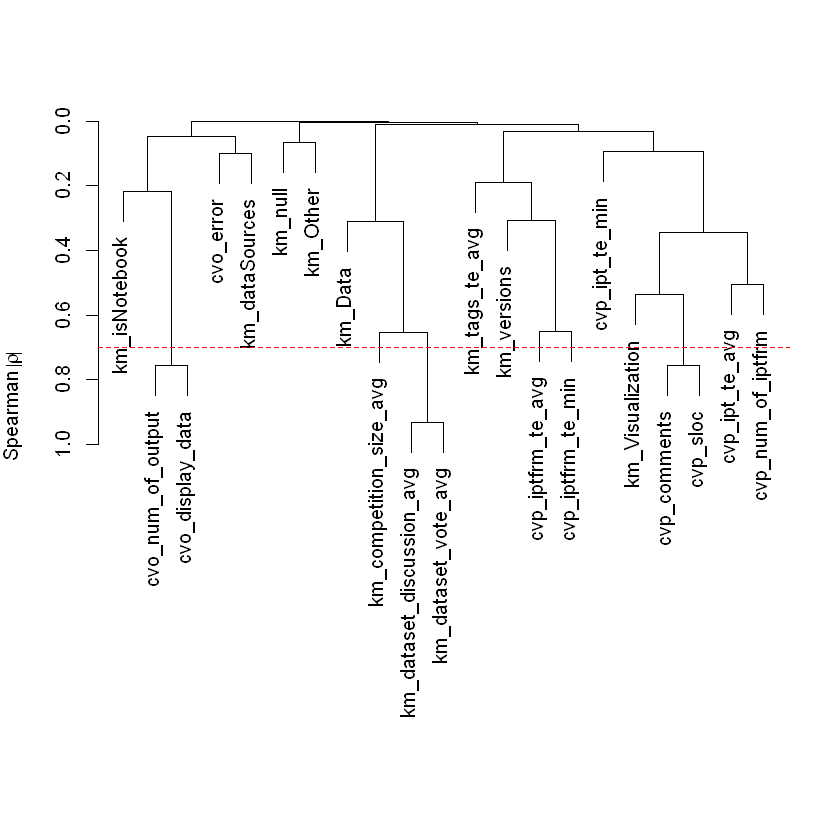

In [6]:
vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [ ]:
reject_vars <- c("cvo_num_of_output", 
                "cvp_sloc", 
                 "km_dataset_vote_avg"
                )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
data <- data[env_vars]

vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

In [ ]:
reject_vars <- c("cvo_display_data"
                )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
data <- data[env_vars]

vcobj = varclus(~ .,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

## Second Step is to prepare the dataframe, add the voted column back to dataframe. 

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

### binary classification: 

In [ ]:
data_classification = cbind(data, high_voted)

In [8]:
head(data_classification)

km_null,km_Other,km_tags_te_avg,cvp_comments,cvp_iptfrm_te_avg,cvp_ipt_te_avg,km_dataset_discussion_avg,km_competition_size_avg,km_isNotebook,km_versions,cvp_iptfrm_te_min,km_Visualization,cvp_ipt_te_min,cvp_num_of_iptfrm,km_Data,cvo_error,km_dataSources,high_voted
0,0,0.07896849,37,0.14154488,0.1150107,0,34757,0.1108033,89,0.08251058,0,0.1128448,7,1,0,1,False
0,0,0.07896849,36,0.09503205,0.1150107,0,34757,0.1108033,371,0.00000000,0,0.1128448,3,1,0,1,False
0,0,0.07896849,66,0.16976930,0.1998296,0,0,0.1108033,766,0.06568712,0,0.1128448,30,0,0,1,False
0,0,0.07896849,44,0.18967610,0.1533643,1,0,0.1059971,4,0.18181818,3,0.1128448,3,0,0,1,False
0,0,0.07896849,56,0.15737604,0.1249175,0,16054448,0.1059971,3,0.04354310,2,0.1128448,10,1,0,1,False
0,0,0.07896849,8,0.15075344,0.1498329,0,117366271,0.1108033,30,0.09385307,0,0.1128448,11,1,0,1,False


This step is used for generating the binary label. 

In [ ]:
summary(data_classification)

## Then Divide the training and testing data

In [ ]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]

Then we fit the model.

In [ ]:
#import the package
library(randomForest)
# Perform training:
rf_classifier2 = randomForest(as.factor(high_voted) ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
# because of the as.factor(...), randomforest can fit a classification model. 
rf_classifier2

In [ ]:
importance(rf_classifier2, type= 1)

In [ ]:
pdf(file="importance_for_python_vote_only.pdf", width = 7, height = 7)
varImpPlot(rf_classifier2, type= 1)
dev.off()

This is AUC. If the stackoverflow gave me the right answer. 

In [ ]:
# import the library that needed in calculating the AUC. 
library(pROC)
library(ROCR)

In [ ]:
# https://stackoverflow.com/questions/46776944/how-to-calculate-randomforest-training-auc-in-r
# the train AUC
rf_p_train <- predict(rf_classifier2, type="prob")[,2]
rf_pr_train <- prediction(rf_p_train, train$high_vote)
r_auc_train <- performance(rf_pr_train, measure = "auc")@y.values[[1]] 
r_auc_train

In [ ]:
#https://stats.stackexchange.com/questions/308645/why-does-randomforest-has-higher-test-auc-than-train-auc-is-this-possible
#the test AUC
rf_p_test <- predict(rf_classifier2, type="prob", newdata = test)[,2]
rf_pr_test <- prediction(rf_p_test, test$high_vote)
r_auc_test <- performance(rf_pr_test, measure = "auc")@y.values[[1]] 
r_auc_test

### Logistic Regression

In [19]:
library(rms)
fit <- lrm(high_voted ~ .,
           data=train, x=T, y=T)

In [20]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))

         AUC AUC_optimism 
0.6434512055 0.0009310391 
